## Day 9

https://adventofcode.com/2022/day/9#part2

In [1]:
def parse09(filename):
    with open(filename) as f:
        data = [ [ l.strip().split(" ")[0], int(l.strip().split(" ")[1]) ] for l in f.readlines() ]
        return data

In [2]:
from collections import defaultdict

M = {"R": (+1,0), "L":(-1,0), "U":(0,+1), "D":(0,-1)}

def moveHead(c,m):
    return tuple([ i+j for i,j in zip(c,M[m]) ])

def moveTail(H,Hprev,T):
    # same position, don't move
    if H==T: 
        return T
    xH,yH = H
    xT,yT = T
    dx = abs(xH-xT)
    dy = abs(yH-yT)
    if dx<=1 and dy<=1: # adiacent, don't move
        return T
    else:
        if dx<=1 and dy==2:
            return (xH,yH-(yH-yT)//dy)
        elif dx==2 and dy<=1:
            return (xH-(xH-xT)//dx,yH)
        elif dx==2 and dy==2:
            return (xH-(xH-xT)//dx,yH-(yH-yT)//dy)

def part1(instr):
    H = (0,0)
    T = (0,0)
    Ht = defaultdict(int)
    Tt = defaultdict(int)
    Ht[H] = 1
    Tt[H] = 1
    for d,n in instr:
        for _ in range(n):
            # move Head
            Hprev = H
            H = moveHead(Hprev,d)
            Ht[H] += 1
            # move Tail
            T = moveTail(H,Hprev,T)
            Tt[T] += 1
    return len(Tt.keys())

In [3]:
instr0 = parse09("examples/example09_1.txt")
instr = parse09("AOC2022inputs/input09.txt")

print("Test 1:",part1(instr0))
print("Part 1:",part1(instr))

Test 1: 13
Part 1: 6464


In [4]:
import matplotlib.pyplot as plt
        
def part2(instr,l=10):
    # rope element traces
    Rt = [ defaultdict(int) for _ in range(l) ]
    # rope elements last position
    rope = [ (0,0) for _ in range(l) ]
    # initial positions
    for Kt in Rt:
        Kt[(0,0)] = 1
    k=0
    for d,n in instr:
        for _ in range(n):
            # move Head
            Hprev = rope[0]
            H = moveHead(Hprev,d)
            Rt[0][H] += 1
            rope[0] = H
            # move other rope elements
            for i in range(1,l):
                Tprev = rope[i]
                T = moveTail(H,Hprev,Tprev)
                Rt[i][T] += 1
                rope[i] = T
                H = T
                Hprev = Tprev
    return len(Rt[9].keys())

In [5]:
instr1 = parse09("examples/example09_2.txt")

print("Test 2:",part2(instr1))
print("Part 2:",part2(instr))

Test 2: 36
Part 2: 2604


### Animation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

def part2animate(instr,
                 xmin=-15,
                 xmax= 15,
                 ymin=-15,
                 ymax= 15,
                 nframesMax = 0,
                 framePace = 1,
                 msize = 4,
                 l=10):
        
    fig = plt.figure(figsize=(8,int(8*(ymax-ymin)/(xmax-xmin))))
    camera = Camera(fig)
    
    # rope element traces
    Rt = [ defaultdict(int) for _ in range(l) ]
    # rope elements last position
    rope = [ (0,0) for _ in range(l) ]
    # initial positions
    for Kt in Rt:
        Kt[(0,0)] = 1
    k=0
    
    print("Generating frames...")

    j=0
    for d,n in instr:
        if j%100==0:
            print("*",end="")
        for _ in range(n):
            # move Head
            Hprev = rope[0]
            H = moveHead(Hprev,d)
            Rt[0][H] += 1
            rope[0] = H
            # move other rope elements
            for i in range(1,l):
                Tprev = rope[i]
                T = moveTail(H,Hprev,Tprev)
                Rt[i][T] += 1
                rope[i] = T
                H = T
                Hprev = Tprev
            # paint rope and tail trace
            if j%framePace==0:
                x = [k[0] for k in rope]
                y = [k[1] for k in rope]
                plt.plot(x,y, marker='o', markersize=msize, linewidth=msize/2, color="blue")
                xt = [k[0] for k in Rt[9].keys()]
                yt = [k[1] for k in Rt[9].keys()]
                plt.plot(xt,yt,color="red")
                plt.xlim(xmin,xmax)
                plt.ylim(ymin,ymax)
                plt.axis("off")            
                camera.snap()
            j+=1
        if nframesMax and j>=nframesMax:
            break

    print("\nSaving frames...")
    return camera

Generating frames...
*
Saving frames...


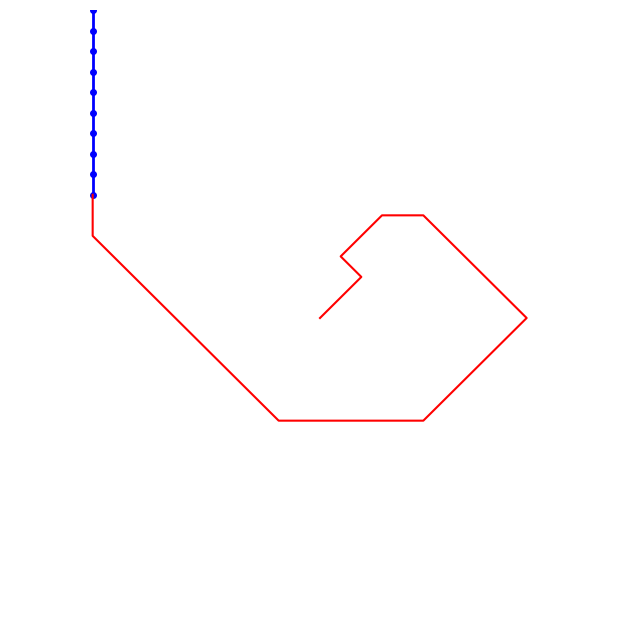

In [7]:
camera1 = part2animate(instr1,-15,15,-15,15)

anim1 = camera1.animate(blit=True)
anim1.save('visualisation/day9animation1.gif', writer='imagemagick')

from IPython.display import HTML
HTML(anim1.to_html5_video())

Generating frames...
*********
Saving frames...
Generatig animation...
Saving animation to GIF...
Saving animation to HMTL video...


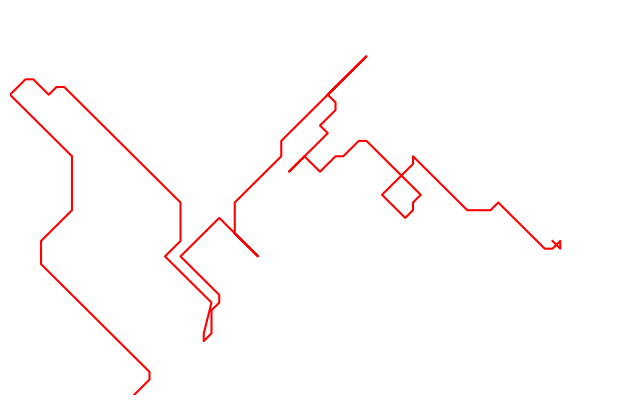

In [8]:
## Full example extremes: -193,71,-96,227
    
camera = part2animate(instr,
                      #-210,120,-100,230, # Full range
                      -70,10,-20,30, # Reduced range
                      nframesMax=2100, # Reduced set of movement instructions
                      framePace=5, # Save only 1 frame every N
                      msize=2)

print("Generatig animation...")
anim = camera.animate(blit=True)

print("Saving animation to GIF...")
anim.save('visualisation/day9animation2.gif', writer='imagemagick', fps=30)

print("Saving animation to HMTL video...")
HTML(anim.to_html5_video())